In [1]:
#!/usr/bin/env python
# coding: utf-8


#import modules for scikit learn, data frame viewing, etc. 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from statsmodels.api import OLS
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


In [2]:
#reads in csv file, data extracted using Scott's scraper
dataset = pd.read_csv('ff_dataQB2019.csv')
#prints description for our data set
pd.set_option('display.max_columns', 40)
dataset.describe()


,l_gp,l_points,l_owners,l_project,l_actual,l_passyds,l_passtd,l_passint,l_rushyds,l_rushtd,l_rush1st,l_recepts,l_recyds,l_rectd,l_rec1st,l_fumble,l_passydpg,l_passtdpg,l_passintpg,l_rushydpg,l_rushtdpg,l_rush1stpg,l_receptspg,l_recydspg,l_rectdpg,l_rec1stpg
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,4.875000,79.262000,0.491500,121.925000,137.275000,1158.550000,6.850000,3.500000,62.700000,0.775000,4.525000,0.100000,0.750000,0.025000,0.075000,1.225000,231.632500,1.322083,0.714167,11.374583,0.135000,0.843333,0.016667,0.125000,0.004167,0.012500
std,1.488201,45.069279,0.385084,139.670562,121.023835,556.306038,4.123417,2.572039,85.561853,1.187272,4.814441,0.632456,4.743416,0.158114,0.474342,1.250385,68.734401,0.639649,0.421494,14.230308,0.205612,0.806860,0.105409,0.790569,0.026352,0.079057
min,2.000000,12.740000,0.010000,2.000000,4.000000,18.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,34.370000,0.107500,36.750000,50.000000,584.000000,3.000000,2.000000,11.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.300000,1.000000,0.500000,2.900000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
50%,5.500000,77.440000,0.465000,60.500000,100.500000,1171.000000,7.000000,3.000000,30.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,239.750000,1.400000,0.600000,6.083333,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000
75%,6.000000,100.295000,0.925000,123.750000,256.000000,1644.750000,9.250000,5.000000,80.500000,1.000000,5.250000,0.000000,0.000000,0.000000,0.000000,2.000000,277.550000,1.800000,1.000000,13.750000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,172.280000,1.000000,466.000000,383.000000,2104.000000,15.000000,11.000000,460.000000,5.000000,24.000000,4.000000,30.000000,1.000000,3.000000,4.000000,350.666667,2.500000,1.833333,76.666667,0.833333,4.000000,0.666667,5.000000,0.166667,0.500000


,l_points,Value
0,mean,79.262
1,median,77.440


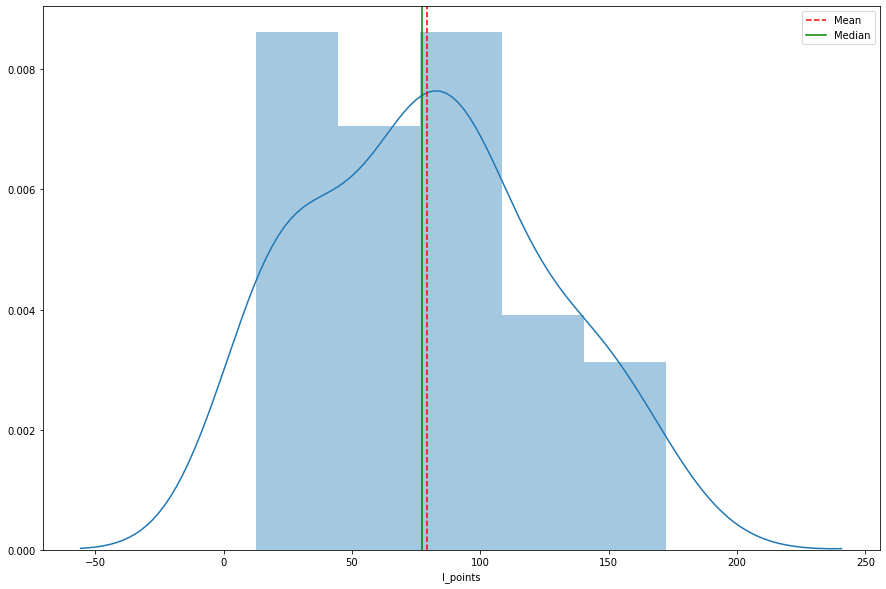

In [3]:
#describes values chosen 
vals = ["l_project", "l_actual",  "l_passintpg", "l_fumble", "l_passydpg", "l_passintpg", "l_passtdpg", "l_rushydpg", "l_rushtdpg", "l_passtd", "l_rushtd"]
 
#predictors
X = dataset[vals].values

#target variable
y = dataset['l_points'].values

#Plot creation
plt.figure(figsize=(15,10))
plt.tight_layout()

seabornInstance.distplot(dataset['l_points'])
mean=dataset['l_points'].mean()
median=dataset['l_points'].median()

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')


plt.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'l_points': ['mean', 'median'], 'Value': [mean, median]})
display(mmm)

In [4]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#summary Statistics Prior to Lasso
print(OLS(y_train,X_train).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              525.1
Date:                Wed, 16 Oct 2019   Prob (F-statistic):                    8.96e-24
Time:                        01:47:24   Log-Likelihood:                         -102.09
No. Observations:                  32   AIC:                                      224.2
Df Residuals:                      22   BIC:                                      238.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/kushgulati/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


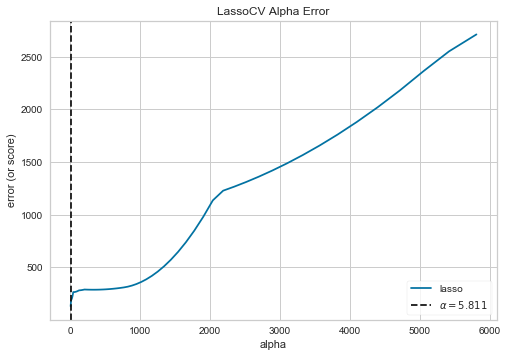

In [10]:
from sklearn.linear_model import LassoCV
import numpy as np
from yellowbrick.regressor import AlphaSelection



# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute="auto", max_iter=1000, tol=0.0001, copy_X=True, cv="warn", verbose=False, n_jobs=None, positive=False, random_state=None, selection = "cyclic")
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [6]:
#Prints Lasso Actual vs Predicted in Tabular Format 

print("Lasso Predict with transformations:")
clf = linear_model.Lasso(alpha = 5.811)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


coefs = pd.DataFrame(clf.coef_, vals)
display(coefs)


print("Intercept: " + str(clf.intercept_))



Lasso Predict with transformations:


,0
l_project,-0.011144
l_actual,-0.112546
l_passintpg,-0.000000
l_fumble,-0.950521
l_passydpg,0.054937
l_passintpg,-0.265810
l_passtdpg,-0.000000
l_rushydpg,0.796970
l_rushtdpg,0.000000
l_passtd,4.702854


Intercept: 40.927290565589274


In [7]:
dfLasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

with pd.option_context("display.max_rows", 100):
    display(dfLasso)

,Actual,Predicted
0,72.52,76.613517
1,73.50,68.350558
2,65.44,76.910604
3,139.64,139.187024
4,98.18,102.759488
5,93.96,94.918618
6,53.74,65.136717
7,97.80,92.875538


Lasso Graph


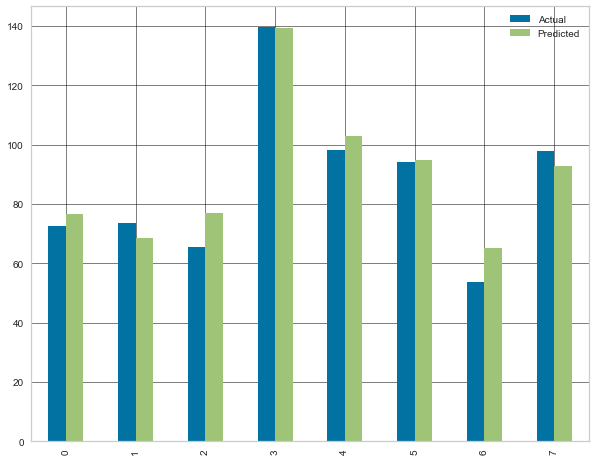

In [8]:
print("Lasso Graph")
dfLasso.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.378227754589262
Mean Squared Error: 43.88496142080948
Root Mean Squared Error: 6.624572546271154
